<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-ChristianTavera01/blob/main/Agos18-19/Tarea2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=np.loadtxt("/content/drive/MyDrive/Colab Notebooks/olympic100m_men.txt",delimiter=",").T

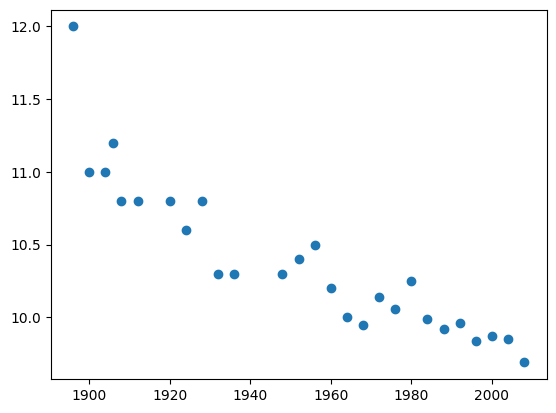

In [5]:
x=data[0]
y=data[1]
plt.scatter(x,y)

Ejercicio: Encuentra la pendiente y ordenada al origen para una linea recta que mejor describe los datos del archivo adjunto utilizando el método de mínimos cuadrados visto en clase

Usando las formulas vistas en clase podemos escribir el siguiente codigo

In [6]:

n=len(x) #Longitud x para promedio
m = (n * sum(x*y) - sum(x) * sum(y)) / (n * sum(x**2) - sum(x)**2)
b = (sum(y)-m*sum(x))/n


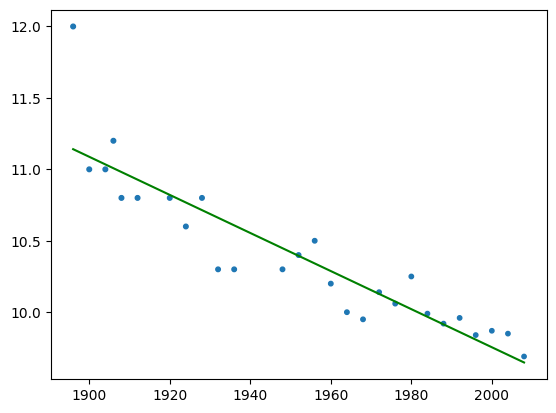

In [7]:
Regresion= m*x + b
plt.scatter(x,y,Regresion) #Scatter para ver los puntos sin regresion
plt.plot(x,Regresion,color = 'green', label='Regresion lineal') #No se usa scatter porque ahora si queremos observar una linea y no puntos

Ahora necesitamos una base de datos propias para resolver un problema practico

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ahora vamos hacerlo con la forma matricial:

In [18]:
#Primero como la maestra para guiarnos

def w(x,y):
  xbar = x.mean()
  ybar = y.mean()
  xxbar = (x**2).mean()
  yybar = (x*y).mean()
  w1 = (ybar*xbar-(x*ybar))/(xbar*xbar-(x*xbar))
  w0 = ybar-w1*xbar
  return w0,w1



In [19]:
#Probamos la funcion con los datos
x_prueba = np.linspace(1896,2008,100)
w_prueba = w(x,y)
print (w_prueba)

(array([-1.42108547e-14,  1.24344979e-14,  4.08562073e-14,  5.50670620e-14,
        1.59872116e-14,  5.15143483e-14,  3.55271368e-14,  0.00000000e+00,
        5.32907052e-14,  1.29674049e-13,  9.23705556e-14, -1.38555833e-13,
        1.95043981e-12, -5.66657832e-13, -4.44089210e-13,  1.20792265e-13,
        5.32907052e-15, -6.39488462e-14, -5.32907052e-15, -5.32907052e-14,
       -8.88178420e-14,  5.50670620e-14,  1.59872116e-14, -1.59872116e-14,
       -4.26325641e-14, -1.77635684e-14, -3.90798505e-14]), array([0.00532155, 0.00532155, 0.00532155, 0.00532155, 0.00532155,
       0.00532155, 0.00532155, 0.00532155, 0.00532155, 0.00532155,
       0.00532155, 0.00532155, 0.00532155, 0.00532155, 0.00532155,
       0.00532155, 0.00532155, 0.00532155, 0.00532155, 0.00532155,
       0.00532155, 0.00532155, 0.00532155, 0.00532155, 0.00532155,
       0.00532155, 0.00532155]))


Ahora si la version matricial

In [20]:
x = np.stack((np.ones_like(x),x)).T
x


array([[1.000e+00, 1.896e+03],
       [1.000e+00, 1.900e+03],
       [1.000e+00, 1.904e+03],
       [1.000e+00, 1.906e+03],
       [1.000e+00, 1.908e+03],
       [1.000e+00, 1.912e+03],
       [1.000e+00, 1.920e+03],
       [1.000e+00, 1.924e+03],
       [1.000e+00, 1.928e+03],
       [1.000e+00, 1.932e+03],
       [1.000e+00, 1.936e+03],
       [1.000e+00, 1.948e+03],
       [1.000e+00, 1.952e+03],
       [1.000e+00, 1.956e+03],
       [1.000e+00, 1.960e+03],
       [1.000e+00, 1.964e+03],
       [1.000e+00, 1.968e+03],
       [1.000e+00, 1.972e+03],
       [1.000e+00, 1.976e+03],
       [1.000e+00, 1.980e+03],
       [1.000e+00, 1.984e+03],
       [1.000e+00, 1.988e+03],
       [1.000e+00, 1.992e+03],
       [1.000e+00, 1.996e+03],
       [1.000e+00, 2.000e+03],
       [1.000e+00, 2.004e+03],
       [1.000e+00, 2.008e+03]])

In [24]:
def w_matricial(x,y):
  x_pru = np.stack((np.ones_like(x),x)).T
  y_pru = y
  XX = np.matmul(x_pru.T,x_pru)
  invXX = np.linalg.inv(XX)
  Xy = np.matmul(x_pru.T,y_pru)
  w = np.matmul(invXX,Xy)
  return w



In [26]:
def w_matricial_2(x,y):
  x_pru = np.stack((np.ones_like(x),x,x**2)).T
  y_pru = y
  XX = np.matmul(x_pru.T,x_pru)
  invXX = np.linalg.inv(XX)
  Xy = np.matmul(x_pru.T,y_pru)
  w = np.matmul(invXX,Xy)
  return w